# DS4200 Homework 5

Due: Monday Nov 2nd @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file included with the coding results to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

In [11]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


### Part 1 Analysis the Wolfe Primates

These data represent 3 months of interactions among a troop of monkeys, observed in the wild by Linda Wolfe as they sported by a river in Ocala, Florida. Joint presence at the river was coded as an interaction and these were summed within all pairs. 

There are two files for the data. `labels.csv` is the file contains information for each monkey, with their genders, ages and their rank in the troop. `link_m.csv` is the file contains the number of their interaction in the adjacency matrix format. 

Note: when load the `link_m.csv`, set the header to be none. 

#### Part 1.1 Visualize the adjacency matrix (10 points)

Load the data and re-arrange the link matrix with the rank. For example, if the original data is:

|   | ID |    Sex | Age | Rank |
|--:|---:|-------:|----:|------|
| 0 |  1 | female |  12 |    3 |
| 1 |  2 |   male |   9 |    2 |
| 2 |  3 |   male |  15 |    1 |
| 3 |  4 |   male |   7 |    5 |
| 4 |  5 | female |   4 |    4 |

Then in the link_m, you need to re-order both rows and columns of the matrix with the order [3,2,1,5,4]. However, you also need to minus one on the index since the starting index in the matrix is 0 while the starting index in the rank is 1. 

Then use the following code to get the data visualization for the adjacency matrix. 
    
    plt.imshow(link_m, cmap='binary', interpolation='none')

Give title and labels for the plot.     

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

labels = pd.read_csv("labels.csv")
link_m = pd.read_csv("link_m.csv", header=None)



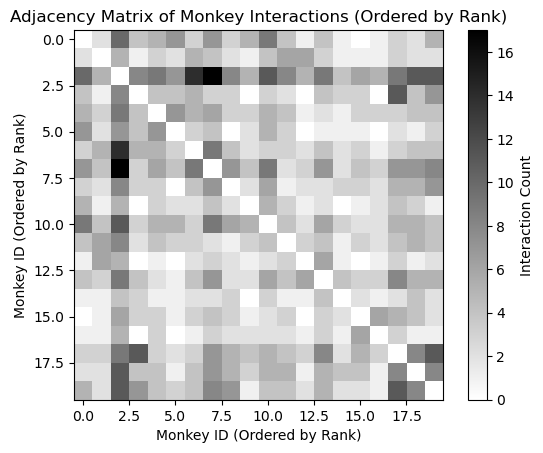

In [16]:


labels_sorted = labels.sort_values(by="Rank")
rank_order = labels_sorted['Id'].values - 1  # Convert to 0-indexed

link_m_reordered = link_m.iloc[rank_order, rank_order]

plt.imshow(link_m_reordered, cmap='binary', interpolation='none')
plt.title("Adjacency Matrix of Monkey Interactions (Ordered by Rank)")
plt.xlabel("Monkey ID (Ordered by Rank)")
plt.ylabel("Monkey ID (Ordered by Rank)")
plt.colorbar(label='Interaction Count')
plt.show()

#### Part 1.2 edgelist (10 points)

Convert the data into a edgelist data frame with three columns: source, target and weight. 

In [17]:
edgelist = []

for i in range(link_m_reordered.shape[0]):
    for j in range(i + 1, link_m_reordered.shape[1]):  # Avoid duplicates
        weight = link_m_reordered.iat[i, j]
        if weight > 0:
            edgelist.append({"source": rank_order[i] + 1, "target": rank_order[j] + 1, "weight": weight})  # Convert back to 1-indexed

edgelist = pd.DataFrame(edgelist)
print(edgelist.head())


   source  target  weight
0       1       2       2
1       1       3      10
2       1       4       4
3       1       5       5
4       1       8       7


#### Part 1.3 Make a static network (15 points)

Use the edgelist generated from part 1.2, make a bipartite network, such that one side is for male and the other side is for female. The colors of the nodes are decided by the gender. The sizes of the nodes are decided by the age. The width of the edges are decided by the weight. 

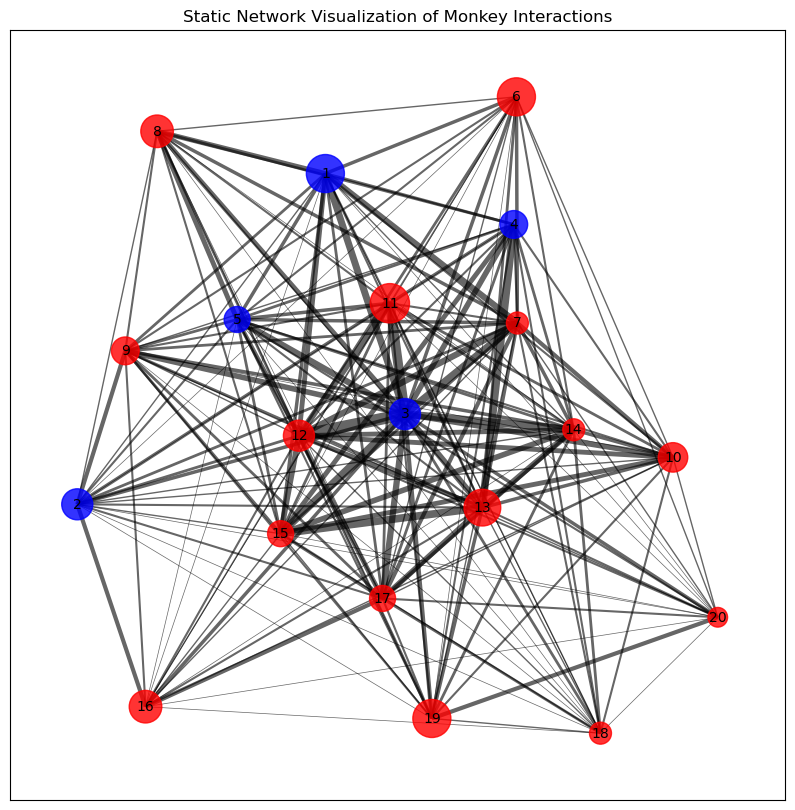

In [18]:
import networkx as nx

G = nx.Graph()

for _, row in labels.iterrows():
    G.add_node(row["Id"], gender=row["Sex"], age=row["Age"])

for _, row in edgelist.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["weight"])

node_color = ["blue" if G.nodes[n]["gender"] == "male" else "red" for n in G.nodes]
node_size = [G.nodes[n]["age"] * 50 for n in G.nodes]
edge_width = [G[u][v]["weight"] / 2 for u, v in G.edges]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Static Network Visualization of Monkey Interactions")
plt.show()


#### Part 1.4 Make an interactive network (15 points)

Now make an interactive network use the same data. No need to maintain the bipartite layout but still colors, sizes and width to customize gender, age and weights. Save the html file and submit it with the Jupyter notebook. 

In [19]:
from pyvis.network import Network

interactive_net = Network(height="750px", width="100%", notebook=True)

for node, attributes in G.nodes(data=True):
    interactive_net.add_node(
        int(node),  # Convert node ID to int
        label=str(node),  # Ensure the label is a string
        color="blue" if attributes["gender"] == "male" else "red",
        size=int(attributes["age"]) * 5,  # Convert age to int
    )

for u, v, attributes in G.edges(data=True):
    interactive_net.add_edge(int(u), int(v), value=int(attributes["weight"]))  # Convert IDs and weight to int

interactive_net.show("interactive_network.html")


interactive_network.html


### Part 2 Design your own social network (30 points)

Now, let's try to visualize your own social network. 

- Open an excel file.
- Set up an adjacency matrix for at least 10 people you know (not including yourself)
- Label the adjacency matrix based on your knowledge whether they know each other or not (You can just use 0/1 to indicate whether they know each other or not)
- Load the adjacency matrix to the Jupyter Notebook
- Convert then data to edgelist
- Plot the static network for your social network
- Now, include yourself into the network, plot the network again
- Discuss what you have seen in two networks and is there a specific layout you have chosen for your network. 

In [20]:
# Load the adjacency matrix
social_network = pd.read_csv("social_network.csv", index_col=0)

# Convert adjacency matrix to edgelist
edgelist_social = []
for i in range(social_network.shape[0]):
    for j in range(i + 1, social_network.shape[1]):  # Avoid duplicates
        if social_network.iloc[i, j] > 0:
            edgelist_social.append({"source": social_network.index[i], 
                                    "target": social_network.columns[j],
                                    "weight": social_network.iloc[i, j]})

edgelist_social = pd.DataFrame(edgelist_social)




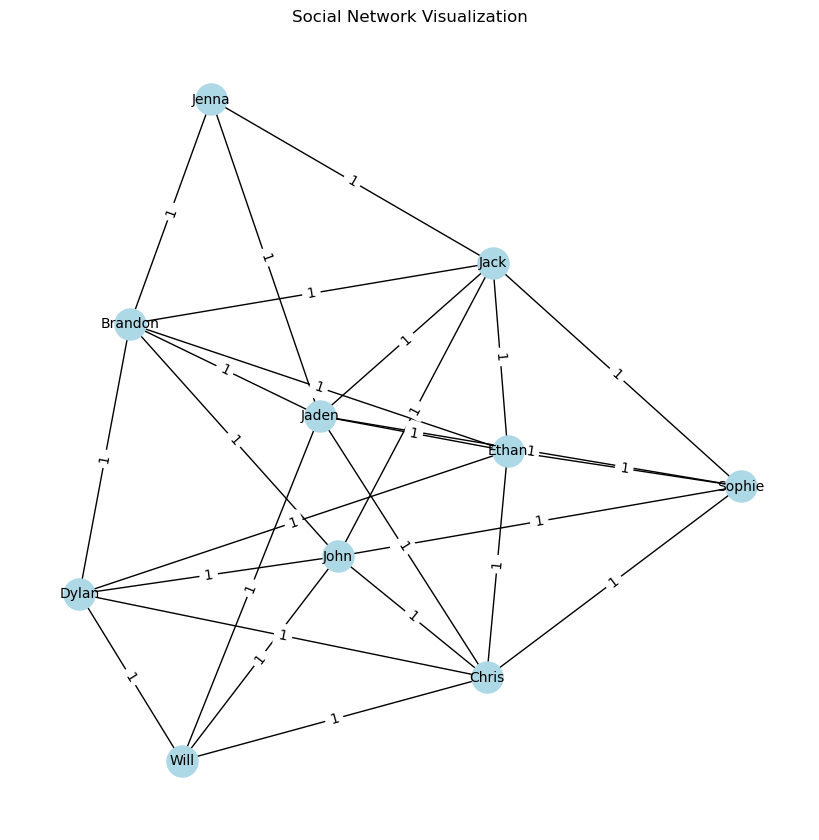

In [21]:
# Create a graph
G_social = nx.Graph()

# Add edges with weights
for _, row in edgelist_social.iterrows():
    G_social.add_edge(row["source"], row["target"], weight=row["weight"])

# Draw the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_social)
nx.draw(G_social, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G_social, pos, edge_labels=nx.get_edge_attributes(G_social, "weight"))
plt.title("Social Network Visualization")
plt.show()


### Part 3 In-class activities in information presentation lecture

Write a paragraph about the importance of data visualization in data analysis (about 100 words). Then identify the logic flow in your writing. 

Data visualization is a crucial part of data analysis as it transforms raw numbers and statistics into an understandable, visually appealing format. It enables analysts and stakeholders to identify trends, outliers, and patterns quickly. Through visual tools like graphs, charts, and networks, complex relationships between variables can be communicated effectively. For example, in network analysis, a visualized graph makes it easier to understand connections between entities compared to viewing an adjacency matrix. The logic flow in data visualization starts from data cleaning, selecting the appropriate chart type, and customizing it to suit the target audience's understanding.
